# Pymaceuticals Inc.
---

### Analysis

In this study, Capomulin demonstrated the most effective treatment for squamous cell carcinoma, outperforming other drug regimens. Ramicane followed closely behind as a strong competitor. There was a notable correlation between average tumor volume and mouse weight, with heavier mice tending to have larger tumor volumes. The study also found one key outlier in the Infubinol regimen, where tumor volumes approached the average values of the top-performing treatments.

Gender did not show any significant impact on treatment outcomes, as the population was evenly split between male and female mice, and no further analysis was conducted to assess sex-based differences. Based on the promising results of Capomulin and Ramicane, the recommendation is to pursue further testing on both treatments, including cost analysis, to explore their potential for clinical application.  If a third option is to be considered, Infubinol could be explored further, as it shows potential promise under certain conditions.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, how= "left", on= "Mouse ID")

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_metadata['Mouse ID'].count()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_mouse_df= mouse_data_complete[~mouse_data_complete['Mouse ID'].isin(duplicate_mice)]
Clean_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = Clean_mouse_df['Mouse ID'].unique()
len(clean_mouse_count)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean= Clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median= Clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var= Clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev= Clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem= Clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mouse_stat_df = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median,
                             'Tumor Volume Variance': var, 'Tumor Volume Std. Dev.': std_dev,
                             'Tumor Volume Std. Err.': sem})

mouse_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_agg_df = Clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
    )

mouse_agg_df.columns = pd.MultiIndex.from_tuples([("Tumor Volume (mm3)", col) for col in mouse_agg_df.columns])

mouse_agg_df

Tumor Volume (mm3)                                          
                           Mean     Median   Variance   Std_Dev       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

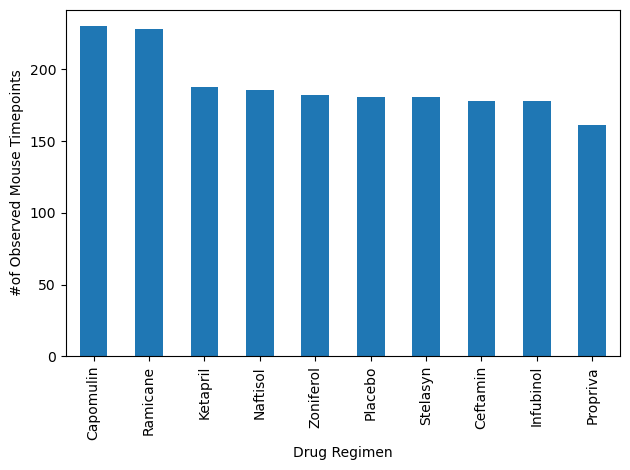

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_types = mouse_data_complete.groupby('Drug Regimen')

mouse_time_ct = drug_types['Mouse ID'].count()
mouse_time_ct = mouse_time_ct.sort_values(ascending=False)

drug_count_chart = mouse_time_ct.plot(kind= "bar")
drug_count_chart.set_ylabel('#of Observed Mouse Timepoints')

plt.tight_layout()
plt.show

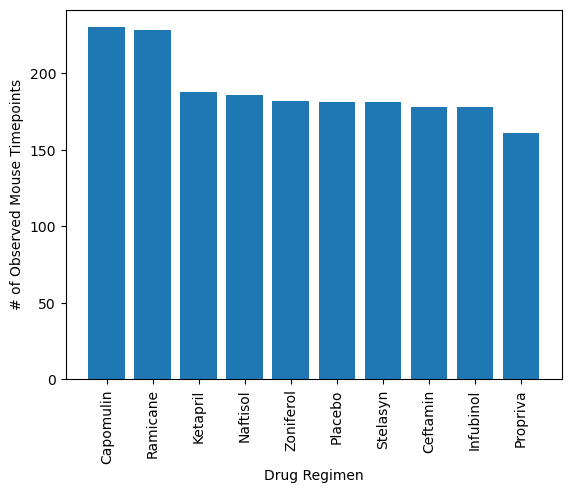

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_types = mouse_data_complete.groupby('Drug Regimen')

mouse_time_ct = drug_types['Mouse ID'].count()
mouse_time_ct = mouse_time_ct.sort_values(ascending=False)

plt.bar(mouse_time_ct.index, mouse_time_ct.values)
plt.xticks(rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

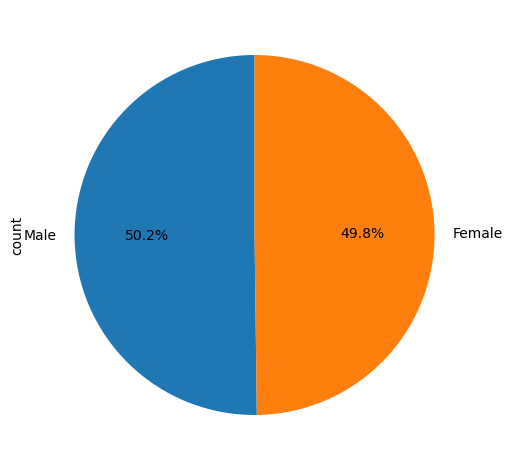

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = mouse_metadata['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
# Make the pie chart
plt.tight_layout()
plt.show

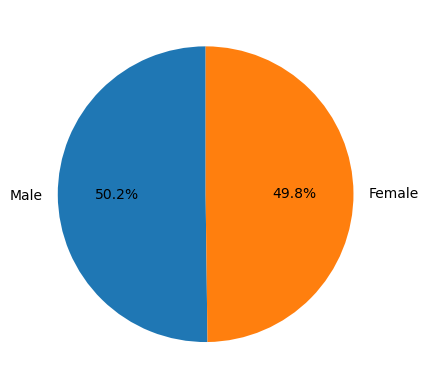

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = mouse_metadata['Sex'].value_counts()
labels = gender_counts.index

# Make the pie chart

plt.pie(gender_counts, labels=labels, autopct='%1.1f%%',  
        startangle=90)

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_data_complete.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = last_timepoint.merge(mouse_data_complete, on=['Mouse ID', 'Timepoint'], how='left')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {}


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in selected_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_data.loc[final_tumor_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    

    # add subset
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])

    # Determine outliers using upper and lower bounds    
    lowerq = quartiles[0.25]
    median = quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = drug_data.loc[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    tumor_vol_data[drug] = drug_data
    
for drug, outliers in tumor_vol_data.items():
    print(f"\n{drug}'s potential outliers:")
    print(outliers)
   


Capomulin's potential outliers:
19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
122    28.430964
125    33.329098
163    46.539206
164    32.377357
170    41.581521
175    23.343598
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers:
6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
77     33.562402
78     36.374510
92     31.560470
94     36.134852
97     22.050126
120    30.564625
127    31.095335
158    45.220869
159    36.561652
167    37.225650
169    43.419381
178    30.276232
191    40.667713
218    43.166373
236    44.183451
245    30.638696
Name: Tumor Volume (mm3), dtype: float64

In

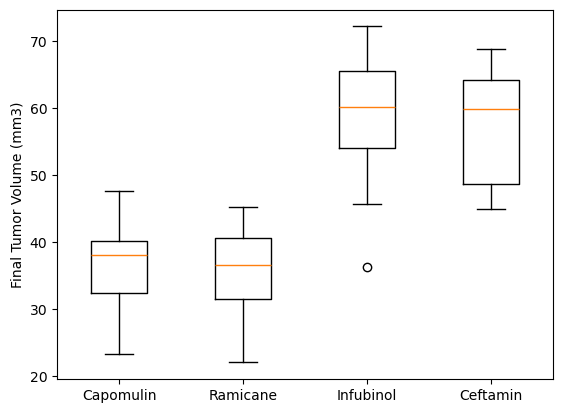

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
filtered_data = [final_tumor_data.loc[final_tumor_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)'] for drug in selected_regimens]

plt.boxplot(filtered_data, tick_labels=selected_regimens)
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

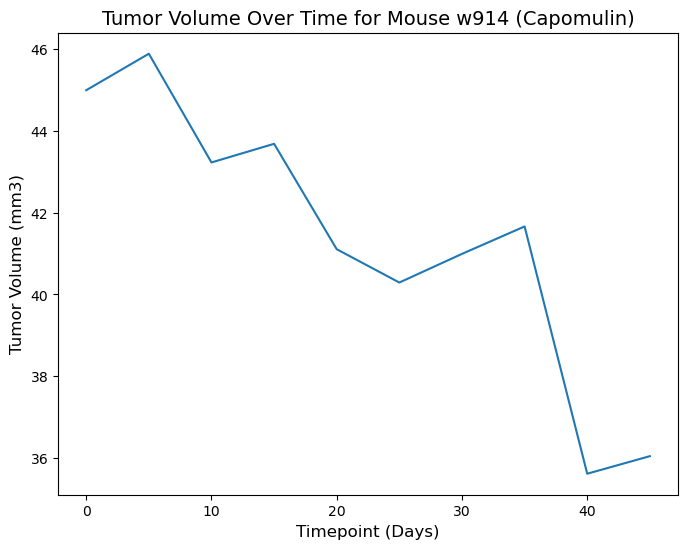

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_id = mouse_data_complete[mouse_data_complete['Drug Regimen'] == 'Capomulin']['Mouse ID'].iloc[12]

mouse_data = mouse_data_complete[mouse_data_complete['Mouse ID'] == single_mouse_id]

plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

plt.title(f"Tumor Volume Over Time for Mouse {single_mouse_id} (Capomulin)", fontsize=14)
plt.xlabel("Timepoint (Days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

plt.show()




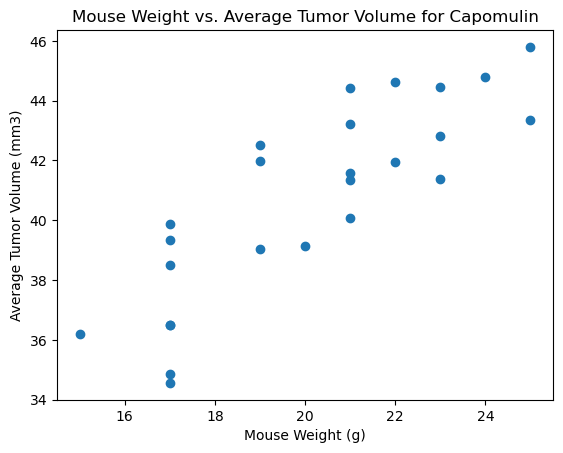

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_data_complete[mouse_data_complete['Drug Regimen'] == 'Capomulin']

avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.drop_duplicates(subset=['Mouse ID'])[['Mouse ID', 'Weight (g)']]

merged_data = pd.merge(mouse_weights,avg_tumor_vol, on='Mouse ID')

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

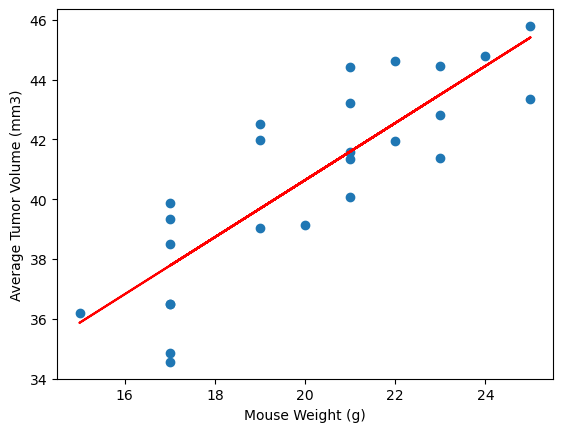

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

regression_line = slope * merged_data['Weight (g)'] + intercept

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.plot(merged_data['Weight (g)'], regression_line, color='red')

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()